# Page View Time Series Visualizer

This project is an assignment for a [freeCodeCamp Data Analysis with Python Certification](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer 'Page View Time Series Visualizer'). You must use Pandas, matplotlib, and seaborn to visualize a **[dataset](https://raw.githubusercontent.com/fishenzone/portfolio/main/data/fcc-forum-pageviews.csv 'CSV file Page View Time Series')** containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03 to understand the patterns in visits and identify yearly and monthly growth.

***[Click here](https://replit.com/@Fishenzone/page-view-time-series-visualizer#README.md 'Replit Page View Time Series Visualizer') to see the link to the data, as well as the full description of the coding challenge.*** 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read and clean the data:

- Format the index column to be the `"date"` column, and set the datatype of the `"date"` index column to be `"datetime"`
- Clean the data by filtering out days when the page views were 2.5% on the top or 2.5% of bottom dataset

In [2]:
df = pd.read_csv('./data/fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

df = df[(df['value'] >= df['value'].quantile(0.025)) &
       (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Create Line Plot

**Requirements:**
- The label on the x axis should be "Date"
- The label on the y axis should be "Page Views"
- The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019"
- Use Matplotlib to draw a line chart
- Plots should show daily freeCodeCamp Forum Page Views 5/2016-12/2019

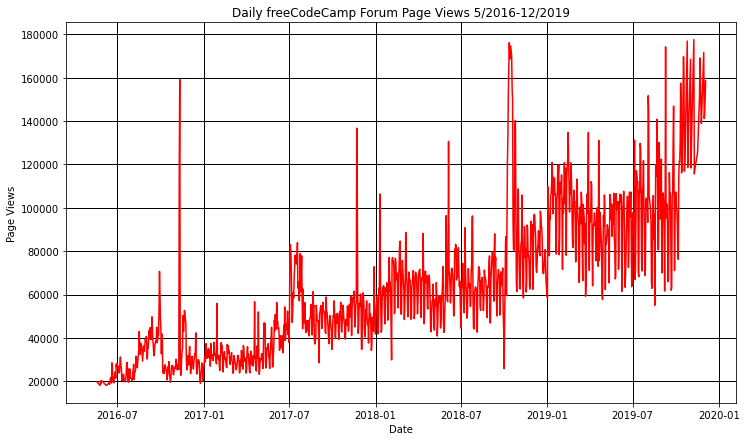

In [3]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(
    df.index,
    df.value,
    c = 'red'
)

ax.set(
    xlabel = 'Date', 
    ylabel = 'Page Views',
    title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'
)

ax.grid(
    color = 'black',  
    linewidth = 1
)

plt.show()

### Create Bar Plot

**Requirements:**
 - Plot should show average daily page views for each month grouped by year
 - The legend should show month labels and have a title of "Months"
 - The label on the x axis should be "Years"
 - The label on the y axis should be "Average Page Views"

In [4]:
df_bar = df.groupby([df.index.year, df.index.month]).mean().unstack()
df_bar

value                                                           \
date             1              2             3             4             5    
date                                                                           
2016            NaN            NaN           NaN           NaN  19432.400000   
2017   32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018   58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019  102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

                                                                              \
date            6             7              8             9              10   
date                                                                           
2016  21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017  43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018  70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019  90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

                                    
date             11             12  
date                                
2016   40448.633333   27832.419355  
2017   57701.566667   48420.580645  
2018   78688.333333   80047.483871  
2019  143166.428571  150733.500000

### Displaying the result in bar chart

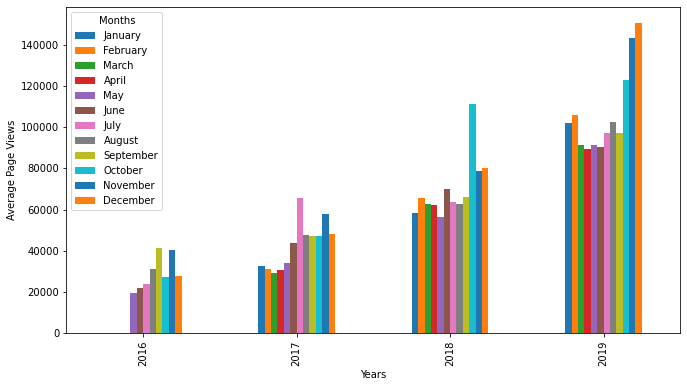

In [5]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
              'September', 'October', 'November', 'December']

df_bar.plot(
    kind = 'bar',
    figsize = (11, 6),
    legend = True
)

plt.xlabel('Years'),
plt.ylabel('Average Page Views')

plt.legend(
    labels = months, 
    title = 'Months'
)

plt.show()

### Create Box Plot

**Requirements:**
 - Use Seaborn
 - Draw two adjacent box plots
 - These box plots should show how the values are distributed within a given year or month and how it compares over time
 - The title of the first chart should be "Year-wise Box Plot (Trend)"
 - The title of the second chart should be "Month-wise Box Plot (Seasonality)"

In [6]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


### Displaying the result in Seaborn's `box plot`

These box plots show how the values are distributed within a given year or month and how it compares over time. 

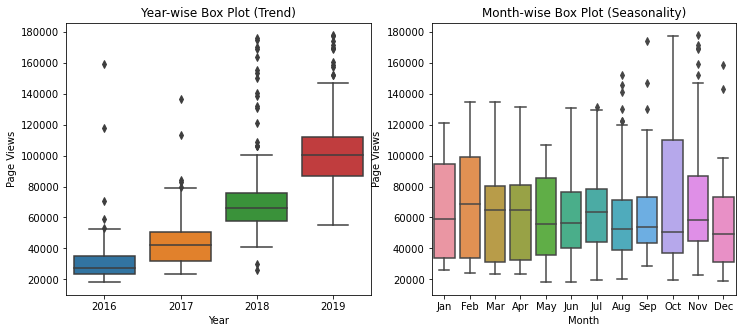

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(
    data = df_box,
    x = 'year', 
    y = 'value',
    ax = ax[0]  
).set(
    xlabel = 'Year',
    ylabel = 'Page Views',
    title = 'Year-wise Box Plot (Trend)'    
)

sns.boxplot(    
    data = df_box,
    x = 'month',
    y = 'value',
    ax = ax[1],
    order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
).set(
    xlabel = 'Month',
    ylabel = 'Page Views',
    title = 'Month-wise Box Plot (Seasonality)'
)

plt.show()